## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

The formula for a simple linear regression is:

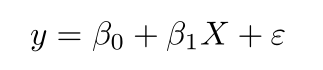

y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
B0 is the intercept, the predicted value of y when the x is 0.
B1 is the regression coefficient – how much we expect y to change as x increases.
x is the independent variable ( the variable we expect is influencing y).
e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

In [33]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"

data = pd.read_csv(url)
print("Data imported successfully")

data.head()

In [ ]:
data.describe()

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
# Plotting the distribution of scores
data.plot(kind = "scatter", x = 'Hours', y = 'Scores', style = 'o', color = 'red')  
plt.title('Hours vs Percentage')  

plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [24]:
X = data.iloc[:, :-1].values  

y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c='red')
plt.plot(X, line)

plt.show()

In [32]:
print(regressor.intercept_)

print(regressor.coef_)

2.018160041434662
[9.91065648]


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

In [ ]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))